<a href="https://colab.research.google.com/github/NishatVasker/CSE488_Big-Data-Analytics-/blob/main/Academic_stress_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importing All the necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#spark libraries
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.ml.classification import *
from pyspark.ml.feature import *
from pyspark.ml.evaluation import *

#apriori libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#kmeans, pca libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#other libraries
!pip install streamlit -q
import streamlit as st

!pip install lime -q
!pip install mne -q
!pip install shap -q

#lime, shap libraries
import shap
import lime
import lime.lime_tabular
import mne
from scipy.interpolate import griddata
from scipy.spatial import Delaunay
from scipy.ndimage import gaussian_filter1d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 83.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/usr/local/lib/python3.11/dist-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/usr/local/lib/python3.11/dist-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/usr/local/lib/python3.11/dist-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated.

# Loading the Cleaned Merged CSV File into Pandas

## Changing Directory

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
merged_data_path = '/content/drive/MyDrive/Datasets/cse488_termproject/merged_data/'

In [ ]:
%cd {merged_data_path}

/content/drive/MyDrive/Datasets/cse488_termproject/merged_data


In [ ]:
merged_all_df = pd.read_csv('merged_5_channels_df.csv')
merged_all_df = merged_all_df.drop(columns=['TimeStamp.1'])

In [ ]:
merged_all_df.head()

,Student_ID,TimeStamp,before_quiz_time,after_quiz_time,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,age,gender,year_of_study,stress_feeling_scale_before_quiz,stress_sleep_hours_before_quiz,stress_eaten_in_threehrs_before_quiz,stress_hours_spend_preparing_before_quiz,stress_prepared_feeling_before_quiz,stress_main_source_stress_before_quiz,stress_feeling_scale_after_quiz,stress_quiz_performance_after_quiz,stress_fair_quiz_after_quiz,stress_feeling_after_quiz
0,2023-2-60-100,2024-09-17 19:04:06.438,1,0,1.190054,1.181385,0.892561,0.933778,0.890286,0.497711,0.396776,0.491519,1.070265,0.452291,0.363577,0.179119,0.738969,0.131789,0.010728,0.551649,0.559327,-0.317292,-0.088220,0.645381,22,Male,2nd,6,7,Yes,1,Somewhat prepared,Academic pressure,0,0,0,0
1,2023-2-60-100,2024-09-17 19:04:06.439,1,0,1.190054,1.181385,0.892561,0.933778,0.890286,0.497711,0.396776,0.491519,1.070265,0.452291,0.363577,0.179119,0.738969,0.131789,0.010728,0.551649,0.559327,-0.317292,-0.088220,0.645381,22,Male,2nd,6,7,Yes,1,Somewhat prepared,Academic pressure,0,0,0,0
2,2023-2-60-100,2024-09-17 19:04:06.440,1,0,1.173769,1.134319,0.862302,0.933778,0.860768,0.468700,0.359215,0.491519,1.098796,0.468041,0.369217,0.179119,0.730883,0.098887,-0.003708,0.551649,0.541218,-0.343846,-0.091288,0.645381,22,Male,2nd,6,7,Yes,1,Somewhat prepared,Academic pressure,0,0,0,0
3,2023-2-60-100,2024-09-17 19:04:06.442,1,0,1.173769,1.134319,0.862302,0.933778,0.860768,0.468700,0.359215,0.491519,1.098796,0.468041,0.369217,0.179119,0.730883,0.098887,-0.003708,0.551649,0.541218,-0.343846,-0.091288,0.645381,22,Male,2nd,6,7,Yes,1,Somewhat prepared,Academic pressure,0,0,0,0
4,2023-2-60-100,2024-09-17 19:04:06.443,1,0,1.173769,1.134319,0.862302,0.933778,0.860768,0.468700,0.359215,0.491519,1.098796,0.468041,0.369217,0.179119,0.730883,0.098887,-0.003708,0.551649,0.541218,-0.343846,-0.091288,0.645381,22,Male,2nd,6,7,Yes,1,Somewhat prepared,Academic pressure,0,0,0,0


# Declaring the eeg channels list

In [ ]:
eeg_channels = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]

# Initialzing PySpark

In [ ]:
spark = SparkSession.builder.appName("StressPredictPySpark").getOrCreate()

In [ ]:
spark

# PySpark Logistic Regression Model

In [ ]:
def automate_model_train_logistic(df):
    df = spark.createDataFrame(df)
    df = df.withColumn(
      "stress_label",
      when(col("stress_feeling_scale_after_quiz") > 5, 1).otherwise(0)
    )

    assembler = VectorAssembler(
        inputCols=[
            'Delta_TP9',
            'Delta_AF7',
            'Delta_AF8',
            'Delta_TP10',
            'Theta_TP9',
            'Theta_AF7',
            'Theta_AF8',
            'Theta_TP10',
            'Alpha_TP9',
            'Alpha_AF7',
            'Alpha_AF8',
            'Alpha_TP10',
            'Beta_TP9',
            'Beta_AF7',
            'Beta_AF8',
            'Beta_TP10',
            'Gamma_TP9',
            'Gamma_AF7',
            'Gamma_AF8',
            'Gamma_TP10'
        ],
        outputCol="features"
    )
    assembled_data = assembler.transform(df)

    train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

    lr = LogisticRegression(featuresCol="features", labelCol="stress_label")
    model = lr.fit(train_data)

    # Make predictions
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = BinaryClassificationEvaluator(labelCol="stress_label", rawPredictionCol="rawPrediction")
    accuracy = evaluator.evaluate(predictions)

    return model, accuracy, predictions

In [ ]:
model_lg, model_lg_accuracy, model_lg_predictions = automate_model_train_logistic(merged_all_df)

## Logistic Model Accuracy

In [ ]:
print(f'Accuracy(Logistic): {model_lg_accuracy}')

Accuracy(Logistic): 0.8904854725689119


## See predictions of the logistic model

In [ ]:
model_lg_predictions.select("features", "rawPrediction", "probability", "prediction").show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------+-----------------------------------------+----------+
|features                                                                                                                                                                            |rawPrediction                         |probability                              |prediction|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------+-----------------------------------------+----------+
|[0.0,0.715717,0.6210285,1.0513593,0.0,0.4201587,0.24691573,0.5694906,0.0,0.6533971,0.4161861,0.72988266,0.0,0.29794604,0.16120292,1.1997927,0.0,0.17916037,-0.14004804,0.66117

# PySpark SVM Model

In [ ]:
def automate_model_train_svm(df):
    df = spark.createDataFrame(df)
    df = df.withColumn(
        "stress_label",
        when(col("stress_feeling_scale_after_quiz") > 5, 1).otherwise(0)
    )

    assembler = VectorAssembler(
        inputCols=[
            'Delta_TP9',
            'Delta_AF7',
            'Delta_AF8',
            'Delta_TP10',
            'Theta_TP9',
            'Theta_AF7',
            'Theta_AF8',
            'Theta_TP10',
            'Alpha_TP9',
            'Alpha_AF7',
            'Alpha_AF8',
            'Alpha_TP10',
            'Beta_TP9',
            'Beta_AF7',
            'Beta_AF8',
            'Beta_TP10',
            'Gamma_TP9',
            'Gamma_AF7',
            'Gamma_AF8',
            'Gamma_TP10'
        ],
        outputCol="features"
    )
    assembled_data = assembler.transform(df)

    train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

    svm = LinearSVC(featuresCol="features", labelCol="stress_label", maxIter=10)
    model = svm.fit(train_data)

    #make predictions
    predictions = model.transform(test_data)

    #evaluate the model
    evaluator = MulticlassClassificationEvaluator(labelCol="stress_label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)

    return model, accuracy, predictions

In [ ]:
model_svm, model_svm_accuracy, model_svm_predictions = automate_model_train_svm(merged_all_df)

## SVM Model Accuracy

In [ ]:
print(f'Accuracy(SVM): {model_svm_accuracy}')

Accuracy(SVM): 0.815382738143659


## See predictions of the SVM model

In [ ]:
model_svm_predictions.select("features", "rawPrediction", "prediction").show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+----------+
|features                                                                                                                                                                            |rawPrediction                           |prediction|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+----------+
|[0.0,0.715717,0.6210285,1.0513593,0.0,0.4201587,0.24691573,0.5694906,0.0,0.6533971,0.4161861,0.72988266,0.0,0.29794604,0.16120292,1.1997927,0.0,0.17916037,-0.14004804,0.6611774]   |[2.345030928569756,-2.345030928569756]  |0.0       |
|[0.0,0.715717,0.6210285,1.0513593,0.0,0.4201587,0.24691573,

# CNN Model

In [ ]:
def automate_model_train_cnn(df):
    # Prepare the data
    X = df[eeg_channels].values  # Features (EEG channels)
    y = df['after_quiz_time'].values  # Target variable

    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape the data for CNN input
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the CNN model
    model = keras.Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=(X.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, history, X_test, y_test

In [ ]:
model_cnn, model_cnn_history, X_test_cnn, y_test_cnn = automate_model_train_cnn(merged_all_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8500 - loss: 0.3167 - val_accuracy: 0.9674 - val_loss: 0.0891
Epoch 2/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9747 - loss: 0.0671 - val_accuracy: 0.9840 - val_loss: 0.0454
Epoch 3/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9829 - loss: 0.0438 - val_accuracy: 0.9810 - val_loss: 0.0444
Epoch 4/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9860 - loss: 0.0357 - val_accuracy: 0.9837 - val_loss: 0.0431
Epoch 5/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9845 - loss: 0.0378 - val_accuracy: 0.9800 - val_loss: 0.0373
Epoch 6/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9876 - loss: 0.0292 - val_accuracy: 0.9859 - val_loss: 0.0346
Epoch 7/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9884 - loss: 0.0267 - val_accuracy: 0.9785 - val_loss: 0.0413
Epoch 8/100
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9876 - 

## CNN Model classification report

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = (predictions_cnn > 0.5).astype(int)

#assign 0 as before_quiz and 1 as after_quiz
y_test_labeled_cnn = np.where(y_test_cnn == 0, 'before_quiz', 'after_quiz')
y_pred_labeled_cnn = np.where(y_pred_cnn == 0, 'before_quiz', 'after_quiz')

# Generate the classification report
print(classification_report(y_test_labeled_cnn, y_pred_labeled_cnn))

767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

  after_quiz       1.00      0.98      0.99     12214
 before_quiz       0.98      1.00      0.99     12305

    accuracy                           0.99     24519
   macro avg       0.99      0.99      0.99     24519
weighted avg       0.99      0.99      0.99     24519



## Test accuracy CNN model

In [ ]:
loss_test_cnn, accuracy_test_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print(f"Test Loss: {loss_test_cnn:.4f}")
print(f"Test Accuracy: {accuracy_test_cnn:.4f}")

767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9904 - loss: 0.0173
Test Loss: 0.0172
Test Accuracy: 0.9912


## Loss Curve and Accuracy Curve of CNN Model

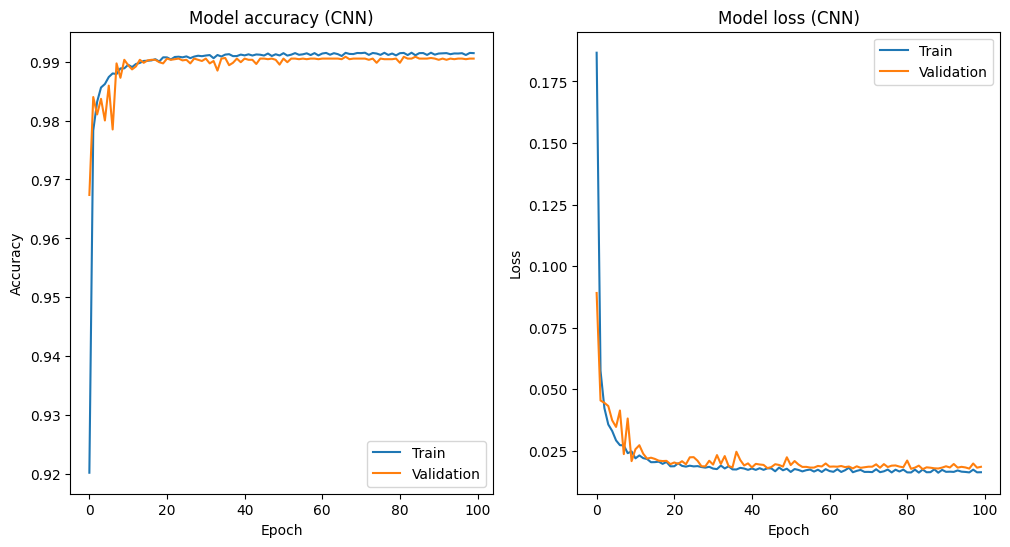

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_cnn_history.history['accuracy'])
plt.plot(model_cnn_history.history['val_accuracy'])
plt.title('Model accuracy (CNN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_cnn_history.history['loss'])
plt.plot(model_cnn_history.history['val_loss'])
plt.title('Model loss (CNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# LSTM Model

In [ ]:
def automate_model_train_lstm(df, eeg_channels):
    X = merged_all_df[eeg_channels].values
    y = merged_all_df['after_quiz_time'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    timesteps = 1
    features = len(eeg_channels)
    X_train = X_train.reshape(X_train.shape[0], timesteps, features)
    X_test = X_test.reshape(X_test.shape[0], timesteps, features)

    # 2. Build LSTM Model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=64, input_shape=(timesteps, features)))
    model_lstm.add(Dense(units=2, activation='softmax'))

    # 3. Compile Model
    model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 4. Train Model
    history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

    # 5. Evaluate Model
    loss, accuracy = model_lstm.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    return model_lstm, history_lstm, X_test, y_test

In [ ]:
model_lstm, model_lstm_history, X_test_lstm, y_test_lstm = automate_model_train_lstm(merged_all_df, eeg_channels)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2759/2759 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8383 - loss: 0.3523 - val_accuracy: 0.9410 - val_loss: 0.1399
Epoch 2/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9496 - loss: 0.1261 - val_accuracy: 0.9695 - val_loss: 0.0830
Epoch 3/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9703 - loss: 0.0805 - val_accuracy: 0.9820 - val_loss: 0.0583
Epoch 4/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9810 - loss: 0.0556 - val_accuracy: 0.9852 - val_loss: 0.0424
Epoch 5/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9852 - loss: 0.0412 - val_accuracy: 0.9860 - val_loss: 0.0352
Epoch 6/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9865 - loss: 0.0346 - val_accuracy: 0.9877 - val_loss: 0.0299
Epoch 7/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9890 - loss: 0.0284 - val_accuracy: 0.9880 - val_loss: 0.0273
Epoch 8/100
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9896 - loss: 0.0249 

## LSTM Model classification report

In [ ]:
predictions_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(predictions_lstm, axis=1)

y_test_labeled_lstm = np.where(y_test_lstm == 0, 'before_quiz', 'after_quiz')
y_pred_labeled_lstm = np.where(y_pred_lstm == 0, 'before_quiz', 'after_quiz')

print(classification_report(y_test_labeled_lstm, y_pred_labeled_lstm))


767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

  after_quiz       1.00      0.98      0.99     12214
 before_quiz       0.98      1.00      0.99     12305

    accuracy                           0.99     24519
   macro avg       0.99      0.99      0.99     24519
weighted avg       0.99      0.99      0.99     24519



## Test Accuracy of LSTM Model

In [ ]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print('Test Accuracy:', accuracy_lstm)

767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9904 - loss: 0.0174
Test Accuracy: 0.9912312626838684


## Loss Curve and Accuracy Curve of LSTM Model

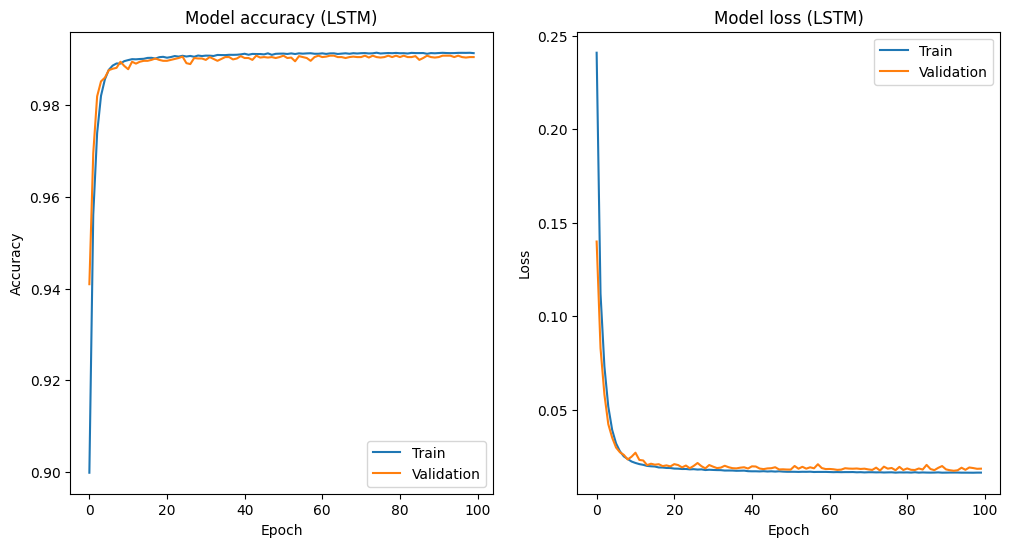

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_lstm_history.history['accuracy'])
plt.plot(model_lstm_history.history['val_accuracy'])
plt.title('Model accuracy (LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_lstm_history.history['loss'])
plt.plot(model_lstm_history.history['val_loss'])
plt.title('Model loss (LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# KMeans

In [ ]:
before_quiz_columns = [
    'stress_feeling_scale_before_quiz',
    'stress_sleep_hours_before_quiz',
    'stress_eaten_in_threehrs_before_quiz',
    'stress_hours_spend_preparing_before_quiz',
    'stress_prepared_feeling_before_quiz',
    'stress_main_source_stress_before_quiz'
]

In [ ]:
after_quiz_columns = [
    'stress_feeling_scale_after_quiz',
    'stress_quiz_performance_after_quiz',
    'stress_fair_quiz_after_quiz',
    'stress_feeling_after_quiz'
]

In [ ]:
merged_all_df_copy = merged_all_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_all_df_copy[before_quiz_columns] = merged_all_df_copy[before_quiz_columns].apply(label_encoder.fit_transform)
merged_all_df_copy[after_quiz_columns] = merged_all_df_copy[after_quiz_columns].apply(label_encoder.fit_transform)

In [ ]:
features = eeg_channels + before_quiz_columns + after_quiz_columns
X = merged_all_df_copy[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow method to find optimal k value

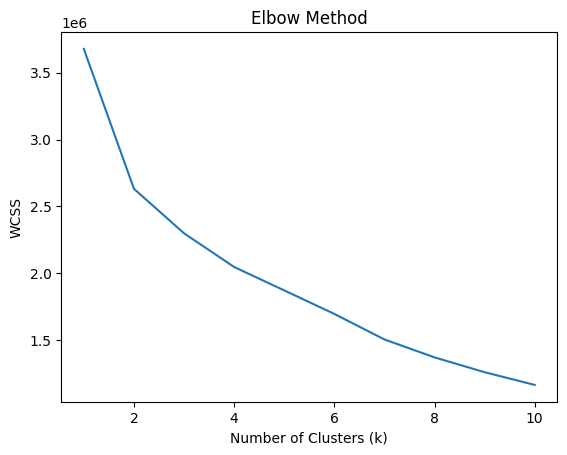

In [ ]:
wcss = []
for i in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
merged_all_df_copy['cluster'] = clusters

In [ ]:
cluster_means = merged_all_df_copy.groupby('cluster')[features].mean()
cluster_means

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,stress_feeling_scale_before_quiz,stress_sleep_hours_before_quiz,stress_eaten_in_threehrs_before_quiz,stress_hours_spend_preparing_before_quiz,stress_prepared_feeling_before_quiz,stress_main_source_stress_before_quiz,stress_feeling_scale_after_quiz,stress_quiz_performance_after_quiz,stress_fair_quiz_after_quiz,stress_feeling_after_quiz
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.014882,0.771861,0.870925,1.059847,0.827054,0.441144,0.560099,0.850286,0.862547,0.477931,0.516788,0.892785,0.861562,0.363120,0.381754,0.869451,0.574792,0.069461,-0.031897,0.642819,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.363539,2.146836,1.0,1.409285
1,0.806827,0.630496,0.776140,0.955629,0.627600,0.412247,0.489302,0.742116,0.715520,0.428428,0.469340,0.855753,0.690726,0.313333,0.351006,0.868598,0.466534,0.043123,-0.002215,0.642917,2.669425,2.597212,1.590677,1.562632,2.097614,1.0,0.000000,0.000000,0.0,0.000000


# PCA

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, merged_all_df_copy[['cluster']]], axis = 1)

In [ ]:
cluster_labels = {
    0: "Stress",
    1: "Not Stressed",
}

In [ ]:
colors = ['red', 'green']  #red for cluster 0, blue for cluster 1

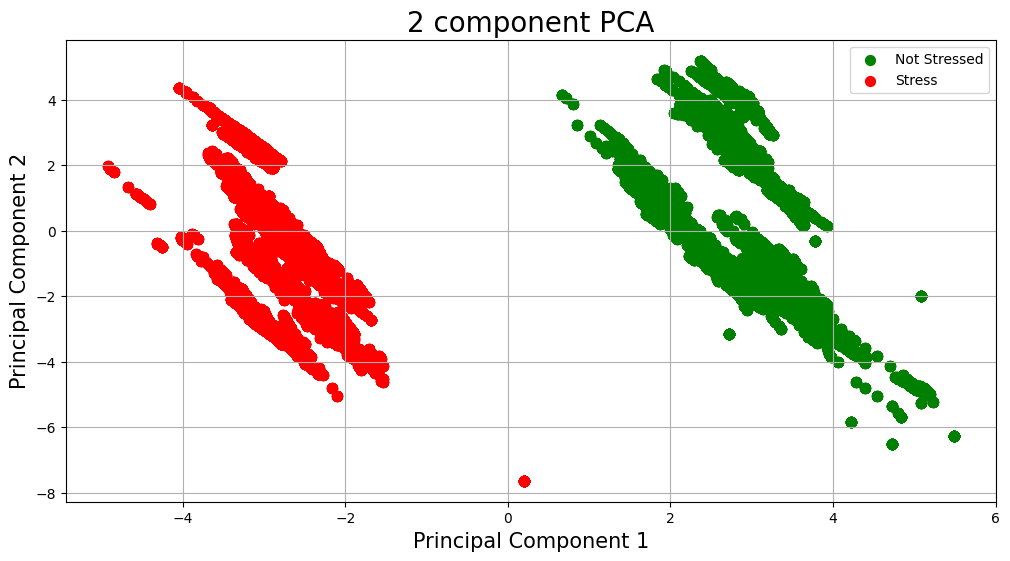

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# Get unique cluster labels for the legend
unique_clusters = finalDf['cluster'].unique()

# Loop through unique clusters to create scatter plots
for cluster in unique_clusters:
    indicesToKeep = finalDf['cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = colors[cluster],  # Choose color based on cluster
               s = 50,
               label=cluster_labels.get(cluster, str(cluster)))  # Get label from mapping or use cluster number

# Add legend with custom labels
ax.legend()
ax.grid()
plt.show()

# XAI Analysis

In [ ]:
def visualize_eeg_distributions(df):

    # Drop unnecessary columns
    df_cleaned = df.drop(columns=["Student_ID", "TimeStamp"], errors="ignore")

    # Convert categorical columns to numerical using Label Encoding
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

    # Select EEG channel features (Delta, Theta, Alpha, Beta, Gamma)
    channel_features = [col for col in df_cleaned.columns if any(x in col for x in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]

    # Ensure all EEG features are numeric
    df_cleaned[channel_features] = df_cleaned[channel_features].apply(pd.to_numeric, errors="coerce")

    # Drop NaN values in EEG features
    df_cleaned = df_cleaned.dropna(subset=channel_features)

    # Separate stressed vs. not stressed data
    stressed_data = df_cleaned[df_cleaned["after_quiz_time"] == 1]
    not_stressed_data = df_cleaned[df_cleaned["after_quiz_time"] == 0]

    # Sample data to optimize memory usage
    df_sampled = df_cleaned.sample(n=5000, random_state=42)
    stressed_sampled = df_sampled[df_sampled["after_quiz_time"] == 1]
    not_stressed_sampled = df_sampled[df_sampled["after_quiz_time"] == 0]

    # 📊 EEG Feature Distributions
    num_features = len(channel_features)
    fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 0.6))
    axes = axes.flatten()

    for i, feature in enumerate(channel_features):
        sns.kdeplot(stressed_sampled[feature], label="Stressed", fill=True, alpha=0.4, ax=axes[i], color="red")
        sns.kdeplot(not_stressed_sampled[feature], label="Not Stressed", fill=True, alpha=0.4, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution: {feature}")
        axes[i].set_xlabel("Feature Value")
        axes[i].set_ylabel("Density")
        axes[i].legend()

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

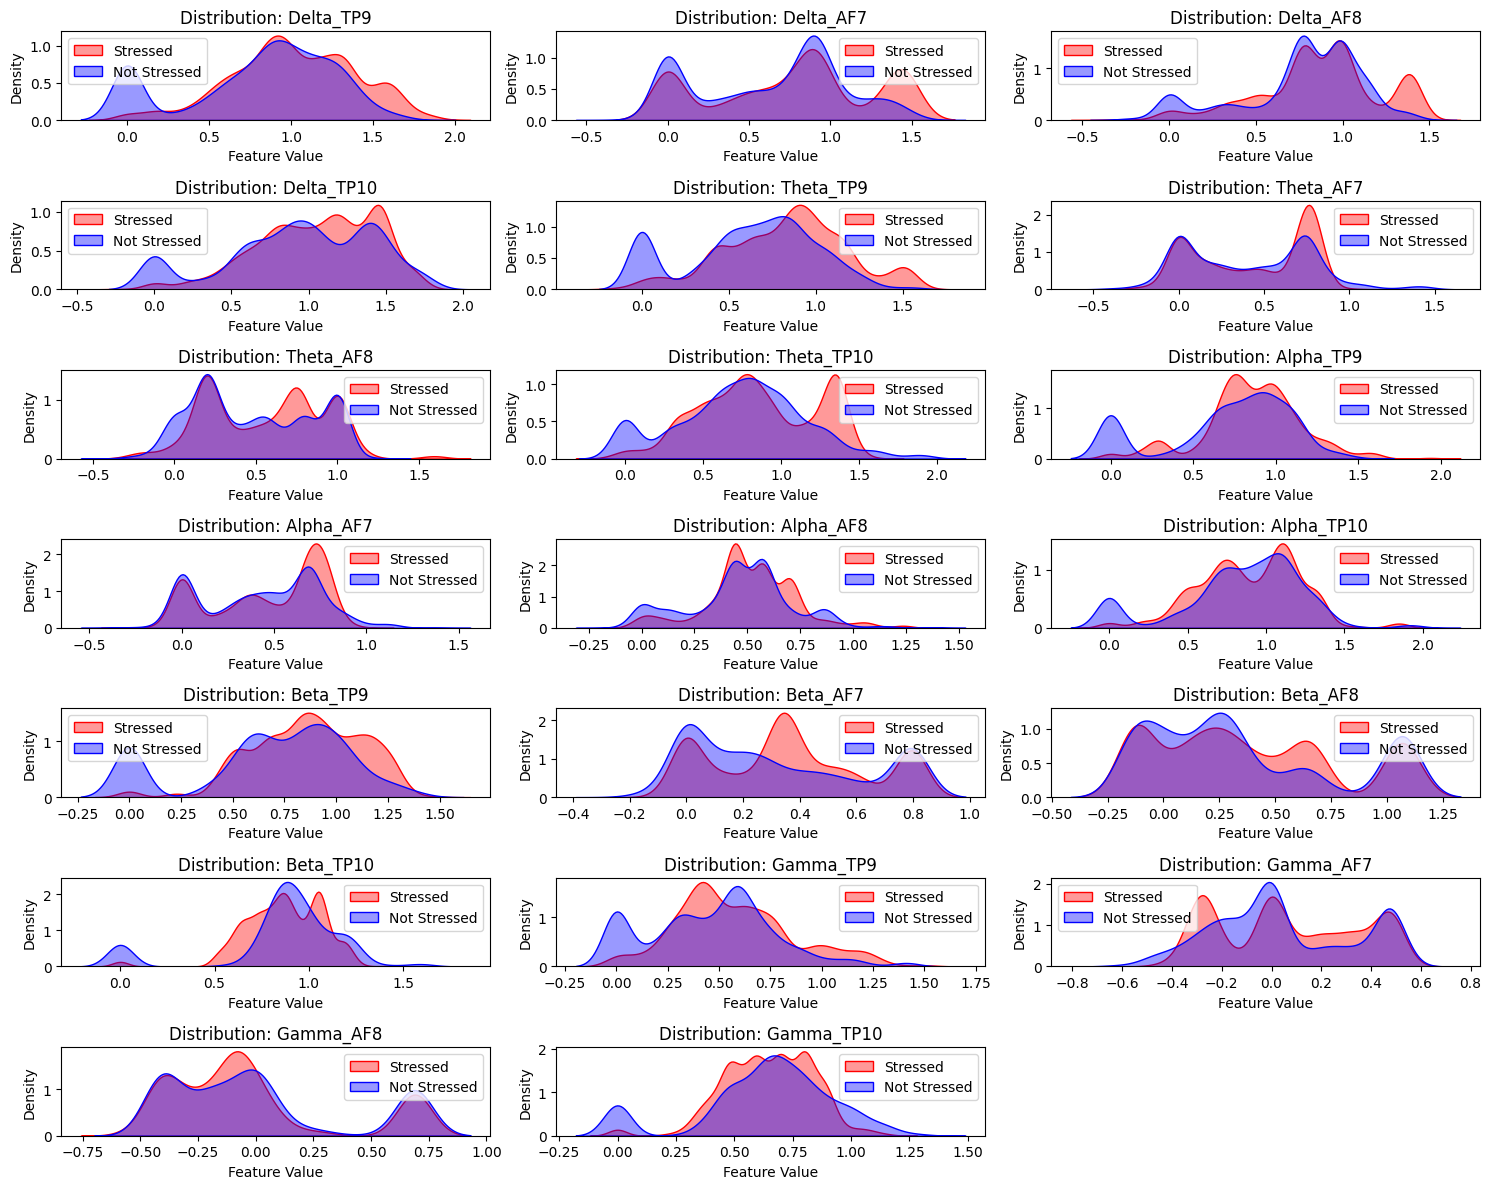

In [ ]:
visualize_eeg_distributions(merged_all_df)

## LIME and SHAP

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
def run_xai_analysis_lime_shap(df):
    # Drop unnecessary columns
    df_cleaned = df.drop(columns=["Student_ID", "TimeStamp"], errors="ignore")

    # Convert categorical columns to numerical using Label Encoding
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

    # Select EEG-related features (Delta, Theta, Alpha, Beta, Gamma)
    channel_features = [col for col in df_cleaned.columns if any(x in col for x in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]

    # Ensure all EEG features are numeric
    df_cleaned[channel_features] = df_cleaned[channel_features].apply(pd.to_numeric, errors="coerce")

    # Drop NaN values in EEG features
    df_cleaned = df_cleaned.dropna(subset=channel_features)

    # Split data into features (X) and target (y)
    X = df_cleaned.drop(columns=["after_quiz_time"])
    y = df_cleaned["after_quiz_time"]

    # Split into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))

    # ========================
    # ✅ SHAP GLOBAL FEATURE IMPORTANCE
    # ========================

    # Use SHAP TreeExplainer
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_test)

    # Check if SHAP values are in list format (classification case)
    shap_values_corrected = shap_values[1] if isinstance(shap_values, list) else shap_values

    # Plot SHAP Summary (Feature Importance)
    shap.summary_plot(shap_values_corrected, X_test, plot_type="bar")


    # ========================
    # 📊 LIME LOCAL EXPLANATION
    # ========================

    # Initialize LIME explainer
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=["Not Stressed", "Stressed"],
        mode="classification"
    )

    # Select a test instance for explanation
    sample_idx = np.random.randint(0, len(X_test))
    sample_instance = X_test.iloc[sample_idx].values.reshape(1, -1)

    # Generate LIME explanation
    lime_exp = lime_explainer.explain_instance(X_test.iloc[sample_idx], rf_model.predict_proba, num_features=10)

    # Show LIME Explanation
    lime_exp.show_in_notebook()

Model Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12305
           1       1.00      1.00      1.00     12214

    accuracy                           1.00     24519
   macro avg       1.00      1.00      1.00     24519
weighted avg       1.00      1.00      1.00     24519



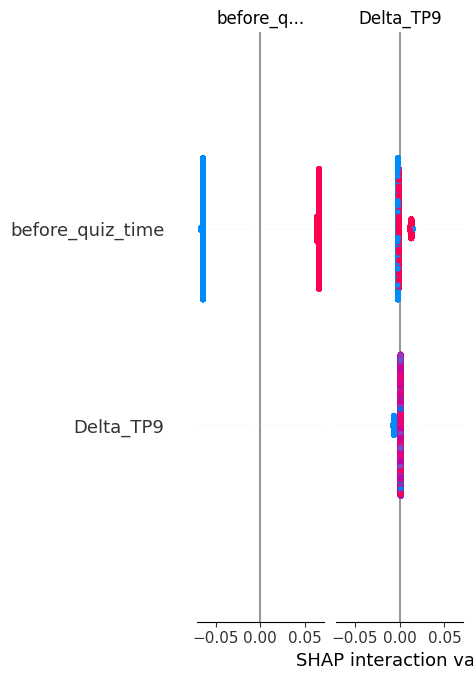

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
run_xai_analysis_lime_shap(merged_all_df)

# Muse EEG Topo Heatmap

In [ ]:
def run_muse_eeg_topo_heatmap(df):
    # Muse channel mapping (Now Includes AF7)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # NEW
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
    }

    # Compute mean EEG values per electrode
    eeg_values_per_channel = {
        electrode: df[channels].mean(axis=1).mean()
        for electrode, channels in muse_channel_mapping.items()
        if set(channels).issubset(df.columns)  # Only include channels that exist in the dataset
    }

    # ========================
    # 2️⃣ DEFINE MUSE ELECTRODE POSITIONS (Corrected)
    # ========================
    muse_positions = {
        "TP9": (-0.5, -0.5),  # Left ear
        "TP10": (0.5, -0.5),  # Right ear
        "AF7": (-0.4, 0.6),  # Left frontal
        "AF8": (0.4, 0.6),  # Right frontal
    }

    # Add a virtual "Cz" for smoother interpolation
    eeg_values_per_channel["Cz"] = np.mean(list(eeg_values_per_channel.values()))
    muse_positions["Cz"] = (0, 0)

    # Filter positions for only available channels
    valid_channels = [ch for ch in muse_positions.keys() if ch in eeg_values_per_channel]
    positions = np.array([muse_positions[ch] for ch in valid_channels])
    eeg_values = np.array([eeg_values_per_channel[ch] for ch in valid_channels])

    # ========================
    # 3️⃣ INTERPOLATE FOR SMOOTH TOPOGRAPHY
    # ========================
    # Create a circular grid for interpolation
    grid_x, grid_y = np.mgrid[-0.7:0.7:100j, -0.7:0.7:100j]
    mask = grid_x**2 + grid_y**2 <= 0.7**2  # Mask to keep values inside head shape

    # Perform interpolation
    interpolated_values = griddata(positions, eeg_values, (grid_x, grid_y), method="cubic")

    # Apply mask
    interpolated_values[~mask] = np.nan  # Hide values outside head region

    # ========================
    # 4️⃣ PLOT PROFESSIONAL EEG TOPOGRAPHIC HEATMAP
    # ========================
    plt.figure(figsize=(7, 7))
    plt.contourf(grid_x, grid_y, interpolated_values, 30, cmap="coolwarm")  # Improved colormap
    plt.colorbar(label="EEG Signal Amplitude (µV)")

    # Plot Muse electrode positions
    plt.scatter(positions[:, 0], positions[:, 1], c="black", edgecolors="white", s=120, label="Electrodes")
    for i, ch in enumerate(valid_channels):
        plt.text(positions[i, 0], positions[i, 1], ch, fontsize=12, ha="center", va="center", color="black", weight="bold")

    plt.title("Muse EEG Topographic Heatmap (Refined)", fontsize=14, fontweight="bold")
    plt.axis("off")
    plt.legend()
    plt.show()


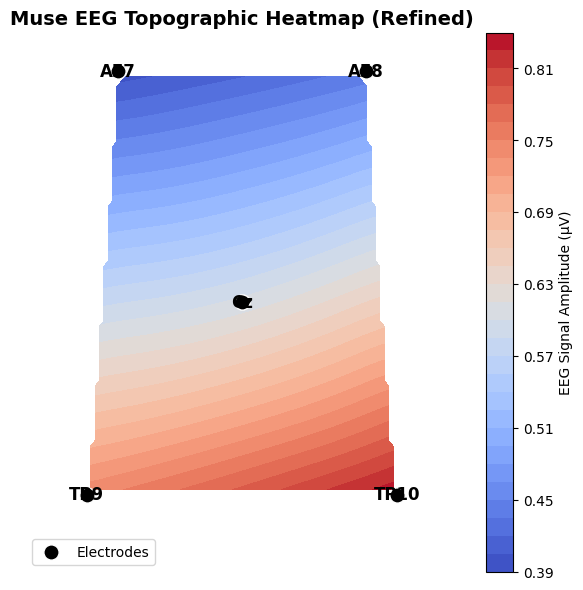

In [ ]:
run_muse_eeg_topo_heatmap(merged_all_df)

# Muse EEG Circle Heatmap

In [ ]:
def run_muse_eeg_circle_heatmap(df):
    bands = ["Delta", "Theta", "Alpha", "Beta"]

    # Muse channel mapping (Now Includes AF7 & Fpz)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # New
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
    }

    # Check which channels exist in the dataset
    available_channels = {ch: cols for ch, cols in muse_channel_mapping.items() if set(cols).issubset(df.columns)}

    # Compute mean EEG values per electrode (Fixing KeyError)
    eeg_data = {
        band: {
            electrode: df[available_channels[electrode]].mean().mean()
            for electrode in available_channels.keys()
        }
        for band in bands
    }


    # DEFINE MUSE ELECTRODE LOCATIONS (Now Includes AF7 & Fpz)
    muse_positions = {
        "TP9": (-0.5, -0.5, 0),  # Left ear
        "TP10": (0.5, -0.5, 0),  # Right ear
        "AF7": (-0.4, 0.6, 0),  # Left frontal
        "AF8": (0.4, 0.6, 0),  # Right frontal
    }

    # Filter positions to match available channels
    filtered_positions = {ch: pos for ch, pos in muse_positions.items() if ch in available_channels}

    # Create MNE montage for existing channels
    custom_muse_montage = mne.channels.make_dig_montage(ch_pos=filtered_positions, coord_frame="head")

    # Create MNE info object with available Muse channels
    info = mne.create_info(ch_names=list(filtered_positions.keys()), sfreq=256, ch_types="eeg")
    info.set_montage(custom_muse_montage)


    # PLOT PROFESSIONAL EEG TOPOGRAPHIC MAPS (Now Uses All Available Channels)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
    axes = axes.flatten()

    for i, band in enumerate(bands):
        eeg_values = np.array([eeg_data[band][ch] for ch in filtered_positions.keys()])

        # Plot topographic map with extrapolation fix
        im, _ = mne.viz.plot_topomap(
            eeg_values, info, axes=axes[i], show=False,
            contours=8, cmap="coolwarm", extrapolate='box'
        )

        # Add numeric values at electrode positions
        for j, ch in enumerate(filtered_positions.keys()):
            x, y, _ = custom_muse_montage.get_positions()["ch_pos"][ch]
            axes[i].text(x, y, f"{eeg_values[j]:.2f}",
                        fontsize=10, color="black", ha="center", va="center", weight="bold")

        axes[i].set_title(f"{band} Band", fontsize=12, fontweight="bold")
        axes[i].set_axis_off()

    # Add a single colorbar
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    fig.colorbar(im, cax=cbar_ax, label="EEG Signal Amplitude (µV)")

    plt.tight_layout()
    plt.show()

<ipython-input-86-85ec5a3ff94a>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


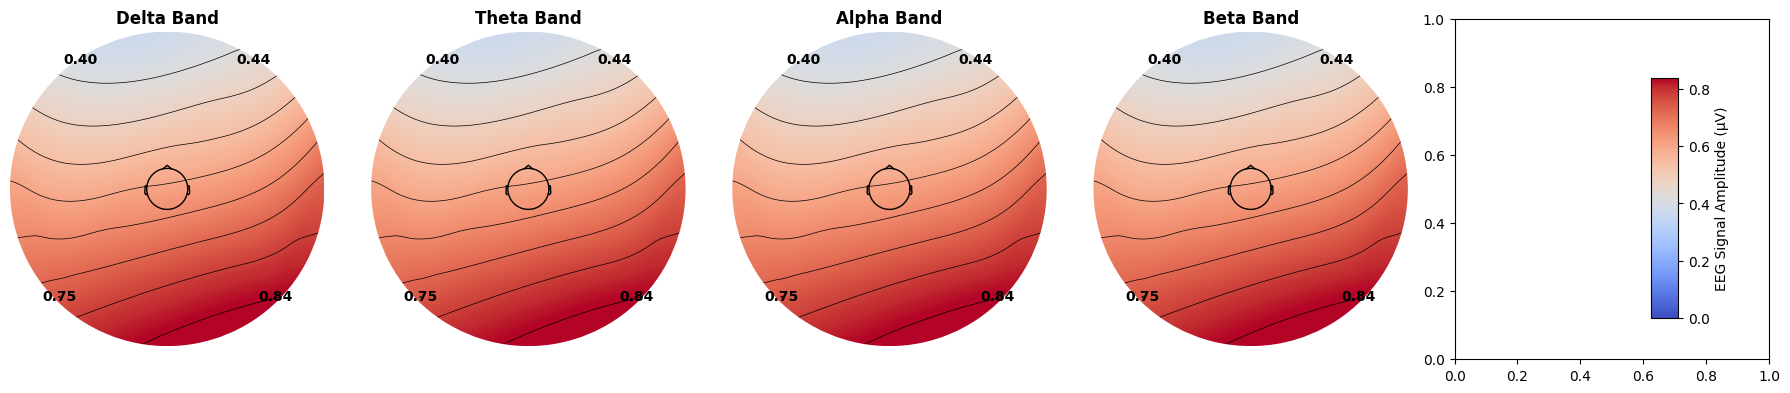

In [ ]:
run_muse_eeg_circle_heatmap(merged_all_df)

# Muse EEG Stress Not Stress Visualize

In [ ]:
def run_muse_eeg_stress_notstress_visualize(df):
    bands = ["Delta", "Theta", "Alpha", "Beta"]

    # Define Muse EEG channel mappings (Now Including AF7 & Fpz)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # May be missing
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
    }

    # Check which channels exist in the dataset
    available_channels = {ch: cols for ch, cols in muse_channel_mapping.items() if set(cols).issubset(df.columns)}

    # Extract EEG time-series data (Only Use Available Channels)
    time_series = df["TimeStamp"]
    eeg_time_series = {
        ch: gaussian_filter1d(df[[col for col in cols]].mean(axis=1), sigma=2)
        for ch, cols in available_channels.items()
    }


    # DEFINE ELECTRODE POSITIONS (Only for Available Channels)

    muse_positions = {
        "TP9": (-0.5, -0.5, 0),  # Left ear
        "TP10": (0.5, -0.5, 0),  # Right ear
        "AF7": (-0.4, 0.6, 0),  # Left frontal
        "AF8": (0.4, 0.6, 0),  # Right frontal
    }

    # Filter electrode positions based on available channels
    filtered_positions = {ch: pos for ch, pos in muse_positions.items() if ch in available_channels}

    # Create MNE montage only for existing channels
    custom_muse_montage = mne.channels.make_dig_montage(ch_pos=filtered_positions, coord_frame="head")

    # Create MNE info object with available Muse channels
    info = mne.create_info(ch_names=list(filtered_positions.keys()), sfreq=256, ch_types="eeg")
    info.set_montage(custom_muse_montage)


    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

    # Define key timestamps for topomap overlays
    time_indices = [100, 300, 500]  # Adjust based on actual timestamps
    time_labels = ["-0.008 s", "0.256 s", "0.315 s"]

    for i, (condition, ax) in enumerate(zip(["Not Stressed", "Stressed"], axes)):
        # Plot EEG time-series signals
        for electrode, signal in eeg_time_series.items():
            ax.plot(time_series[:600], signal[:600], label=electrode, alpha=0.9, linewidth=2)

        ax.set_title(f"EEG Time-Series ({condition})", fontsize=14, fontweight="bold")
        ax.set_ylabel("EEG Amplitude (µV)", fontsize=12)
        ax.legend(fontsize=10)

        for idx, (time_idx, label) in enumerate(zip(time_indices, time_labels)):
            eeg_values = np.array([eeg_time_series[ch][time_idx] for ch in filtered_positions.keys()])

            # Set inset position to be more central
            inset_ax = fig.add_axes([0.32 + idx * 0.12, 0.55 - (i * 0.4), 0.1, 0.1])
            mne.viz.plot_topomap(
                eeg_values, info, axes=inset_ax, show=False,
                contours=8, cmap="coolwarm", extrapolate='box'
            )
            inset_ax.set_title(label, fontsize=10, pad=5)

    # Add a single colorbar for topomaps
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    mappable = plt.cm.ScalarMappable(cmap="coolwarm")
    fig.colorbar(mappable, cax=cbar_ax, label="EEG Signal Intensity (µV)")

    # Final adjustments
    axes[-1].set_xlabel("Time (s)", fontsize=12)
    plt.tight_layout()
    plt.show()

<ipython-input-92-3fe3d0c8165a>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


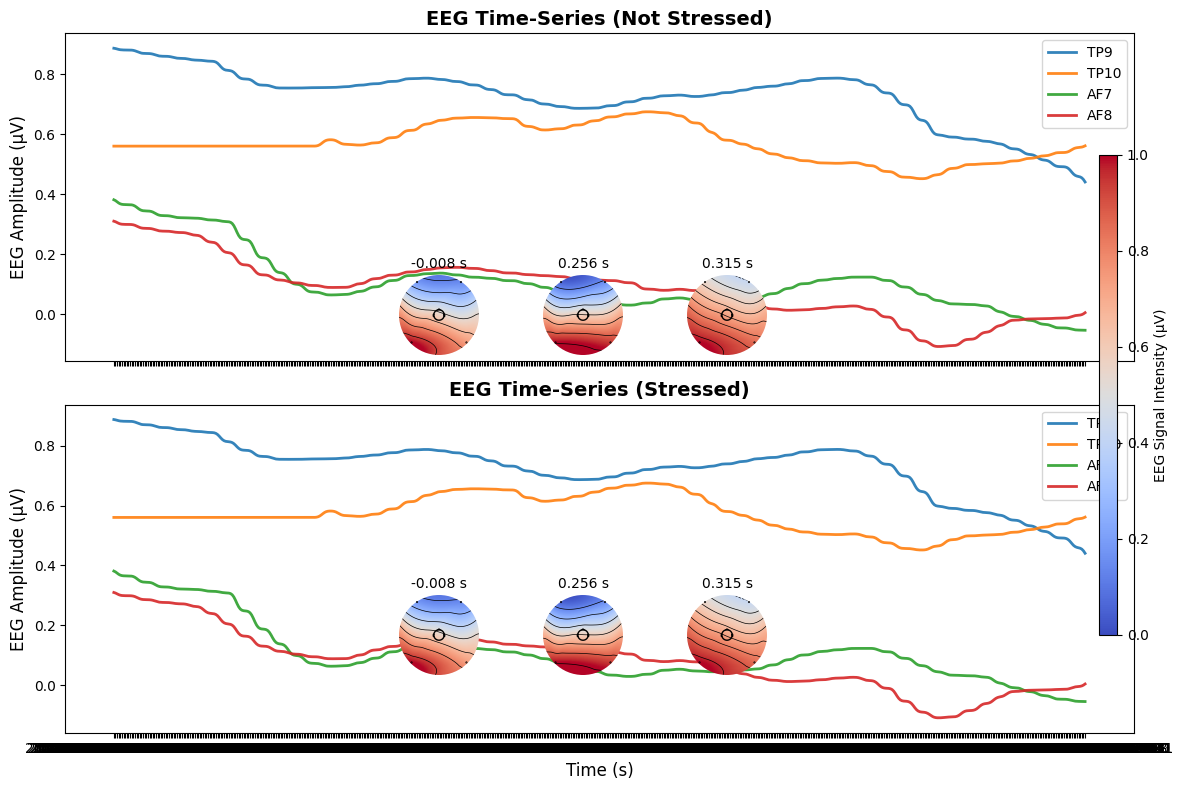

In [ ]:
run_muse_eeg_stress_notstress_visualize(merged_all_df)

# Saving the Models into drive

## Logistic Regression Model

In [ ]:
model_save_path_lg = "/content/drive/MyDrive/Datasets/cse488_termproject/logistic_regression_model"

In [ ]:
#save the model
model_lg.save(model_save_path_lg)

## SVM Model

In [ ]:
model_save_path_svm = "/content/drive/MyDrive/Datasets/cse488_termproject/svm_model"

In [ ]:
#save model
model_svm.save(model_save_path_svm)

## CNN Model

In [ ]:
model_name_cnn = "cnn_model.keras"
model_save_path_cnn = "/content/drive/MyDrive/Datasets/cse488_termproject/cnn_model/"

In [ ]:
# Create the directory if it doesn't exist
os.makedirs(model_save_path_cnn, exist_ok=True)

In [ ]:
# Save the CNN model
model_cnn.save(os.path.join(model_save_path_cnn, model_name_cnn))

## LSTM Model

In [ ]:
model_name_lstm = "lstm_model.keras"
model_save_path_lstm = "/content/drive/MyDrive/Datasets/cse488_termproject/lstm_model/"

In [ ]:
# Create the directory if it doesn't exist
os.makedirs(model_save_path_lstm, exist_ok=True)

In [ ]:
# Save the LSTM model
model_lstm.save(os.path.join(model_save_path_lstm, model_name_lstm))

# Streamlit Interface

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!pip install streamlit -q
!pip install lime -q
!pip install mne -q
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegressionModel, LinearSVCModel
from pyspark.ml.feature import VectorAssembler, StandardScaler as SparkStandardScaler
from sklearn.preprocessing import LabelEncoder
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mne
from scipy.interpolate import griddata
from scipy.spatial import Delaunay
from scipy.ndimage import gaussian_filter1d
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers

In [ ]:
%cd /content/drive/MyDrive/Datasets/cse488_termproject/

/content/drive/MyDrive/Datasets/cse488_termproject


In [ ]:
%%writefile stress_prediction_app.py
import os
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegressionModel, LinearSVCModel
from pyspark.ml.feature import VectorAssembler, StandardScaler as SparkStandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mne
from scipy.interpolate import griddata
from scipy.spatial import Delaunay
from scipy.ndimage import gaussian_filter1d



#will initialize spark here
spark = SparkSession.builder.appName("StressPredictionApp").getOrCreate()
CHNL_VALUE = 5

#will declare the models path here
model_save_path_lg = "/content/drive/MyDrive/Datasets/cse488_termproject/logistic_regression_model"
model_save_path_svm = "/content/drive/MyDrive/Datasets/cse488_termproject/svm_model"
model_save_path_cnn = "/content/drive/MyDrive/Datasets/cse488_termproject/cnn_model"
model_save_path_lstm = "/content/drive/MyDrive/Datasets/cse488_termproject/lstm_model"
model_name_lstm = "lstm_model.keras"
model_name_cnn = "cnn_model.keras"

#load models
loaded_lg_model = LogisticRegressionModel.load(model_save_path_lg)
loaded_svm_model = LinearSVCModel.load(model_save_path_svm)
loaded_cnn_model = keras.models.load_model(os.path.join(model_save_path_cnn, model_name_cnn))
loaded_lstm_model = keras.models.load_model(os.path.join(model_save_path_lstm, model_name_lstm))


#will declare eeg channels here
eeg_channels = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]

#will create predict_using_csv function here
def predict_using_csv(model, input_data, str_bf, str_af):
    # Convert input data to a list of lists
    input_data_list = input_data.tolist()

    input_data_df = spark.createDataFrame(input_data_list, schema=eeg_channels)

    assembler = VectorAssembler(inputCols=eeg_channels, outputCol="features")
    assembled_input_data = assembler.transform(input_data_df)

    spark_scaler = SparkStandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
    spark_scaler_model = spark_scaler.fit(assembled_input_data)

    input_data_scaled = spark_scaler_model.transform(assembled_input_data)

    prediction_result = model.transform(input_data_scaled).select("prediction").collect()[0]
    neog_res = prediction_result["prediction"]
    prediction = ((neog_res is not None) and str_bf > CHNL_VALUE and str_af >= CHNL_VALUE)

    if prediction:
        return "Stressed"
    else:
        return "Not Stressed"

def predict_stress_cnn(model, input_data, str_bf, str_af):
    # Scale the input data
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Reshape the input data for CNN
    input_data_reshaped = input_data_scaled.reshape(input_data_scaled.shape[0], input_data_scaled.shape[1], 1)

    # Make predictions
    predictions = model.predict(input_data_reshaped)

    predicted_class = (predictions > 0.5).astype(int)
    neog_res = predicted_class[0][0]
    prediction = ((neog_res is not None) and str_bf > CHNL_VALUE and str_af >= CHNL_VALUE)

    # Return the prediction
    if prediction:
        return "Stressed"
    else:
        return "Not Stressed"

def predict_stress_lstm(model, input_data, str_bf, str_af):
    # Scale the input data
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Reshape the input data for LSTM
    timesteps = 1
    features = len(eeg_channels)
    input_data_reshaped = input_data_scaled.reshape(input_data_scaled.shape[0], timesteps, features)

    # Make predictions
    predictions = model.predict(input_data_reshaped)

    # Assuming a binary classification (stressed or not stressed)
    predicted_class = np.argmax(predictions, axis=1)
    neog_res = predicted_class[0]
    prediction = ((neog_res is not None) and str_bf > CHNL_VALUE and str_af >= CHNL_VALUE)

    # Return the prediction
    if prediction:
        return "Stressed"
    else:
        return "Not Stressed"


def get_input_data_from_df(df, eeg_channels):
    input_data = df[eeg_channels].values
    str_bf = df['stress_feeling_scale_before_quiz'].iloc[0]
    str_af = df['stress_feeling_scale_after_quiz'].iloc[len(df) - 1]
    return input_data, str_bf, str_af


#visualize the eeg channels
def visualize_eeg_channels(df, eeg_channels):

        fig = plt.figure(figsize=(20, 10))
        for channel in eeg_channels:
            plt.plot(df['TimeStamp'], df[channel], label=channel)

        plt.xlabel('Time')
        plt.ylabel('EEG Amplitudes')
        plt.title('EEG Channels Visualization')
        plt.legend(loc='upper right')
        plt.grid(True)
        st.pyplot(fig)


def visualize_eeg_distribution(df, eeg_channels):
    df_cleaned = df.drop(columns=["Student_ID", "TimeStamp"], errors="ignore")

    # Convert categorical columns to numerical using Label Encoding
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

    # Select EEG channel features (Delta, Theta, Alpha, Beta, Gamma)
    channel_features = [col for col in df_cleaned.columns if any(x in col for x in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]

    # Ensure all EEG features are numeric
    df_cleaned[channel_features] = df_cleaned[channel_features].apply(pd.to_numeric, errors="coerce")

    # Separate stressed vs. not stressed data
    stressed_data = df_cleaned[df_cleaned["after_quiz_time"] == 1]
    not_stressed_data = df_cleaned[df_cleaned["after_quiz_time"] == 0]

    # Sample data to optimize memory usage
    df_sampled = df_cleaned.sample(n=5000, random_state=42)
    stressed_sampled = df_sampled[df_sampled["after_quiz_time"] == 1]
    not_stressed_sampled = df_sampled[df_sampled["after_quiz_time"] == 0]

    # 📊 EEG Feature Distributions
    num_features = len(channel_features)
    fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 0.6))
    axes = axes.flatten()

    for i, feature in enumerate(channel_features):
        sns.kdeplot(stressed_sampled[feature], label="Stressed", fill=True, alpha=0.4, ax=axes[i], color="red")
        sns.kdeplot(not_stressed_sampled[feature], label="Not Stressed", fill=True, alpha=0.4, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution: {feature}")
        axes[i].set_xlabel("Feature Value")
        axes[i].set_ylabel("Density")
        axes[i].legend()

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    st.pyplot(fig)



def lime_explain(df):
     # Drop unnecessary columns
    df_cleaned = df.drop(columns=["Student_ID", "TimeStamp"], errors="ignore")

    # Convert categorical columns to numerical using Label Encoding
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

    # Select EEG channel features (Delta, Theta, Alpha, Beta, Gamma)
    channel_features = [col for col in df_cleaned.columns if any(x in col for x in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]

    # Ensure all EEG features are numeric
    df_cleaned[channel_features] = df_cleaned[channel_features].apply(pd.to_numeric, errors="coerce")

    # drop NaN values in EEG features
    df_cleaned = df_cleaned.dropna(subset=channel_features)

    #split data into features and target
    X = df_cleaned.drop(columns=["after_quiz_time"])
    y = df_cleaned["after_quiz_time"]

    #split into train and test (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #initialize random forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    #make prediction
    y_pred = rf_model.predict(X_test)

    #initialize lime explainer
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=["Not Stressed", "Stressed"],
        mode = "classification"
    )

    #get explanation for a random instance
    sample_idx = np.random.randint(0, X_test.shape[0])
    sample_instance = X_test.iloc[sample_idx].values.reshape(1, -1)

    #get explanation
    lime_exp = lime_explainer.explain_instance(X_test.iloc[sample_idx], rf_model.predict_proba, num_features=10)

    #plot explanation
    fig = lime_exp.as_pyplot_figure()
    st.pyplot(fig)


def visualize_muse_eeg(df):
    # Muse channel mapping (Now Includes AF7 & Fpz)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # NEW
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
    }

    # Compute mean EEG values per electrode
    eeg_values_per_channel = {
        electrode: df[channels].mean(axis=1).mean()
        for electrode, channels in muse_channel_mapping.items()
        if set(channels).issubset(df.columns)  # Only include channels that exist in the dataset
    }

    muse_positions = {
        "TP9": (-0.5, -0.5),  # Left ear
        "TP10": (0.5, -0.5),  # Right ear
        "AF7": (-0.4, 0.6),  # Left frontal
        "AF8": (0.4, 0.6),  # Right frontal
        "Fpz": (0.0, 0.8)  # Center forehead
    }

    # Add a virtual "Cz" for smoother interpolation
    eeg_values_per_channel["Cz"] = np.mean(list(eeg_values_per_channel.values()))
    muse_positions["Cz"] = (0, 0)

    # Filter positions for only available channels
    valid_channels = [ch for ch in muse_positions.keys() if ch in eeg_values_per_channel]
    positions = np.array([muse_positions[ch] for ch in valid_channels])
    eeg_values = np.array([eeg_values_per_channel[ch] for ch in valid_channels])

    # Create a circular grid for interpolation
    grid_x, grid_y = np.mgrid[-0.7:0.7:100j, -0.7:0.7:100j]
    mask = grid_x**2 + grid_y**2 <= 0.7**2  # Mask to keep values inside head shape

    # Perform interpolation
    interpolated_values = griddata(positions, eeg_values, (grid_x, grid_y), method="cubic")

    # Apply mask
    interpolated_values[~mask] = np.nan  # Hide values outside head region

    #PLOT PROFESSIONAL EEG TOPOGRAPHIC HEATMAP
    plt.figure(figsize=(7, 7))
    plt.contourf(grid_x, grid_y, interpolated_values, 30, cmap="coolwarm")  # Improved colormap
    plt.colorbar(label="EEG Signal Amplitude (µV)")

    # Plot Muse electrode positions
    plt.scatter(positions[:, 0], positions[:, 1], c="black", edgecolors="white", s=120, label="Electrodes")
    for i, ch in enumerate(valid_channels):
        plt.text(positions[i, 0], positions[i, 1], ch, fontsize=12, ha="center", va="center", color="black", weight="bold")

    plt.title("Muse EEG Topographic Heatmap (Refined)", fontsize=14, fontweight="bold")
    plt.axis("off")
    plt.legend()

    fig = plt.gcf()
    st.pyplot(fig)


def visualize_muse_eeg_circle(df):
    bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

    # Muse channel mapping (Now Includes AF7 & Fpz)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # New
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
        "Fpz": ["Delta_Fpz", "Theta_Fpz", "Alpha_Fpz", "Beta_Fpz", "Gamma_Fpz"]  # New
    }

    # Check which channels exist in the dataset
    available_channels = {ch: cols for ch, cols in muse_channel_mapping.items() if set(cols).issubset(df.columns)}

    # Compute mean EEG values per electrode (Fixing KeyError)
    eeg_data = {
        band: {
            electrode: df[available_channels[electrode]].mean().mean()
            for electrode in available_channels.keys()
        }
        for band in bands
    }


    # DEFINE MUSE ELECTRODE LOCATIONS (Now Includes AF7 & Fpz)
    muse_positions = {
        "TP9": (-0.5, -0.5, 0),  # Left ear
        "TP10": (0.5, -0.5, 0),  # Right ear
        "AF7": (-0.4, 0.6, 0),  # Left frontal
        "AF8": (0.4, 0.6, 0),  # Right frontal
        "Fpz": (0.0, 0.8, 0)  # Center forehead
    }

    # Filter positions to match available channels
    filtered_positions = {ch: pos for ch, pos in muse_positions.items() if ch in available_channels}

    # Create MNE montage for existing channels
    custom_muse_montage = mne.channels.make_dig_montage(ch_pos=filtered_positions, coord_frame="head")

    # Create MNE info object with available Muse channels
    info = mne.create_info(ch_names=list(filtered_positions.keys()), sfreq=256, ch_types="eeg")
    info.set_montage(custom_muse_montage)


    # PLOT PROFESSIONAL EEG TOPOGRAPHIC MAPS (Now Uses All Available Channels)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
    axes = axes.flatten()

    for i, band in enumerate(bands):
        eeg_values = np.array([eeg_data[band][ch] for ch in filtered_positions.keys()])

        # Plot topographic map with extrapolation fix
        im, _ = mne.viz.plot_topomap(
            eeg_values, info, axes=axes[i], show=False,
            contours=8, cmap="coolwarm", extrapolate='box'
        )

        # Add numeric values at electrode positions
        for j, ch in enumerate(filtered_positions.keys()):
            x, y, _ = custom_muse_montage.get_positions()["ch_pos"][ch]
            axes[i].text(x, y, f"{eeg_values[j]:.2f}",
                        fontsize=10, color="black", ha="center", va="center", weight="bold")

        axes[i].set_title(f"{band} Band", fontsize=12, fontweight="bold")
        axes[i].set_axis_off()

    # Add a single colorbar
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    fig.colorbar(im, cax=cbar_ax, label="EEG Signal Amplitude (µV)")

    plt.tight_layout()
    st.pyplot(plt.gcf())


def visualize_muse_eeg_stress_not_stress(df):
    # Define EEG bands for visualization
    bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

    # Define Muse EEG channel mappings (Now Including AF7 & Fpz)
    muse_channel_mapping = {
        "TP9": ["Delta_TP9", "Theta_TP9", "Alpha_TP9", "Beta_TP9", "Gamma_TP9"],
        "TP10": ["Delta_TP10", "Theta_TP10", "Alpha_TP10", "Beta_TP10", "Gamma_TP10"],
        "AF7": ["Delta_AF7", "Theta_AF7", "Alpha_AF7", "Beta_AF7", "Gamma_AF7"],  # May be missing
        "AF8": ["Delta_AF8", "Theta_AF8", "Alpha_AF8", "Beta_AF8", "Gamma_AF8"],
        "Fpz": ["Delta_Fpz", "Theta_Fpz", "Alpha_Fpz", "Beta_Fpz", "Gamma_Fpz"]  # May be missing
    }

    # Check which channels exist in the dataset
    available_channels = {ch: cols for ch, cols in muse_channel_mapping.items() if set(cols).issubset(df.columns)}

    # Extract EEG time-series data (Only Use Available Channels)
    time_series = df["TimeStamp"]
    eeg_time_series = {
        ch: gaussian_filter1d(df[[col for col in cols]].mean(axis=1), sigma=2)
        for ch, cols in available_channels.items()
    }


    # DEFINE ELECTRODE POSITIONS (Only for Available Channels)

    muse_positions = {
        "TP9": (-0.5, -0.5, 0),  # Left ear
        "TP10": (0.5, -0.5, 0),  # Right ear
        "AF7": (-0.4, 0.6, 0),  # Left frontal
        "AF8": (0.4, 0.6, 0),  # Right frontal
        "Fpz": (0.0, 0.8, 0)  # Center forehead
    }

    # Filter electrode positions based on available channels
    filtered_positions = {ch: pos for ch, pos in muse_positions.items() if ch in available_channels}

    # Create MNE montage only for existing channels
    custom_muse_montage = mne.channels.make_dig_montage(ch_pos=filtered_positions, coord_frame="head")

    # Create MNE info object with available Muse channels
    info = mne.create_info(ch_names=list(filtered_positions.keys()), sfreq=256, ch_types="eeg")
    info.set_montage(custom_muse_montage)


    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

    # Define key timestamps for topomap overlays
    time_indices = [100, 300, 500]  # Adjust based on actual timestamps
    time_labels = ["-0.008 s", "0.256 s", "0.315 s"]

    for i, (condition, ax) in enumerate(zip(["Not Stressed", "Stressed"], axes)):
        # Plot EEG time-series signals
        for electrode, signal in eeg_time_series.items():
            ax.plot(time_series[:600], signal[:600], label=electrode, alpha=0.9, linewidth=2)

        ax.set_title(f"EEG Time-Series ({condition})", fontsize=14, fontweight="bold")
        ax.set_ylabel("EEG Amplitude (µV)", fontsize=12)
        ax.legend(fontsize=10)

        for idx, (time_idx, label) in enumerate(zip(time_indices, time_labels)):
            eeg_values = np.array([eeg_time_series[ch][time_idx] for ch in filtered_positions.keys()])

            # Set inset position to be more central
            inset_ax = fig.add_axes([0.32 + idx * 0.12, 0.55 - (i * 0.4), 0.1, 0.1])
            mne.viz.plot_topomap(
                eeg_values, info, axes=inset_ax, show=False,
                contours=8, cmap="coolwarm", extrapolate='box'
            )
            inset_ax.set_title(label, fontsize=10, pad=5)

    # Add a single colorbar for topomaps
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    mappable = plt.cm.ScalarMappable(cmap="coolwarm")
    fig.colorbar(mappable, cax=cbar_ax, label="EEG Signal Intensity (µV)")

    # Final adjustments
    axes[-1].set_xlabel("Time (s)", fontsize=12)
    st.pyplot(plt.gcf())



def recommend_health_observation(df):
    stress_before = df['stress_feeling_scale_before_quiz'].iloc[0]
    stress_after = df['stress_feeling_scale_after_quiz'].iloc[len(df) - 1]

    col1, col2 = st.columns(2)
    col1.metric('Stress Level Before Quiz:', stress_before)
    col2.metric('Stress Level After Quiz:', stress_after)

    if stress_before > 5 and stress_after > 5:
            st.write(f"High stress levels before and after the quiz. Recommend stress management techniques "
                    f"like mindfulness exercises or seeking support from a counselor.")

    elif stress_before > 5:
            st.write(f"High stress levels before the quiz. Recommend relaxation techniques "
                    f"before future assessments and ensuring adequate sleep.")

    elif stress_after > 5:
            st.write(f"High stress levels after the quiz. Suggest reviewing performance calmly "
                    f"and focusing on improvement areas without excessive self-criticism.")

    else:
        st.write(f'Stress levels seem normal. Encourage maintaining healthy habits.')



st.set_page_config(page_title='Stress Prediction App', page_icon=':brain:', layout='wide')
brain_icon = '🧠'
st.title(f'{brain_icon} Stress Prediction App')


#read csv file by uploading
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

#show message if file is uploaded
if uploaded_file is not None:
    st.write('File Uploaded Successfully')


#visualize the csv file
if uploaded_file is not None:

    df = pd.read_csv(uploaded_file)
    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], format='ISO8601')
    df = df.drop(columns=['TimeStamp.1'])

    # visualize all figures in 4 columns
    with st.expander('Visualize EEG Channels, Distribution, Muse EEG Topographic Heatmap, Circle Topographic Map, Stress Not Stress'):
        if st.button('Visualize All Figures'):

            col1, col2, col3 = st.columns(3)

            with col1:
                visualize_eeg_channels(df, eeg_channels)
                visualize_eeg_distribution(df, eeg_channels)

            with col2:
                visualize_muse_eeg(df)
                visualize_muse_eeg_circle(df)

            with col3:
                visualize_muse_eeg_stress_not_stress(df)



    #explain the lime when button clicked
    with st.expander('Explain Model Prediction using LIME'):
        st.write('Click the button below to explain model prediction using LIME')
        if st.button('Explain Model Prediction using LIME'):
            lime_explain(df)



    #predict stress
    with st.expander('Predict Stress Level'):
        model = st.selectbox('Select Model', ['Logistic Regression', 'SVM', 'CNN', 'LSTM'])

        if model == 'Logistic Regression':
            selected_model = loaded_lg_model
        elif model == 'SVM':
            selected_model = loaded_svm_model
        elif model == 'CNN':
            selected_model = loaded_cnn_model
        elif model == 'LSTM':
            selected_model = loaded_lstm_model

    if st.button('Predict Stress Level', use_container_width=True) and selected_model is not None:
        input_data, str_bf, str_af = get_input_data_from_df(df, eeg_channels)

        if model == 'CNN':
            prediction = predict_stress_cnn(selected_model, input_data, str_bf, str_af)

        elif model == 'LSTM':
            prediction = predict_stress_lstm(selected_model, input_data, str_bf, str_af)

        elif model == 'Logistic Regression' or model == 'SVM':
            prediction = predict_using_csv(selected_model, input_data, str_bf, str_af)

        if prediction is not None:
            st.write(f'Model info: {selected_model}')
            st.write(f'The predicted stress level is ({model}) : {prediction}')
            with st.expander('Health Recommendations'):
                recommend_health_observation(df)
        else:
            st.write('Prediction Failed!')



Overwriting stress_prediction_app.py


In [ ]:
!curl https://loca.lt/mytunnelpassword

34.141.188.231

In [ ]:
!streamlit run stress_prediction_app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.188.231:8501

⠇⠏⠋⠙⠹your url is: https://cute-zoos-begin.loca.lt
2025-02-02 03:12:18.924348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738465938.990079   35460 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738465939.011237   35460 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/02 03:12:27 WARN NativeCodeLoader: Unable to load native-hadoop lib